<div>
<img src="pics/reddit.png" width="200" align="left"/>
</div>
<h1 style="font-size: 40px; color:#ec4e20; align: center; text-shadow: 2px 2px  #777777;">Reddit API</h1>
<p>
    <font size=4px><b><i>Using Python Reddit API Wrapper and Sentiment Analysis</i></b></font>
    <br><font face="Product Sans">Timothy Jonah E. Borromeo
    <br> Jonzee Carel S. Nietes</font>
</p>
    </div>
    </div>

<h1 style="font-size: 30px; color:#ec4e20; align: center; text-shadow: 2px 2px  #777777;">Executive Summary</h1>   
    

The internet is has been a vast platform for social engagements. It curates to every living person in this world, to browsing social media, post photos or videos, sharing moments of their lives unto the interweb, sharing their thoughts and views to the public. Enter Reddit, a website where communities are built to share their communal interests with other people online.

The researchers used **`Python Reddit API Wrapper`** to collect data from **`Reddit.com`** collated from the Hot section of the aforementioned site from a specific subreddit.The reserchers used the subreddit r/PublicFreakout to determine how much engagement it gets with the use of **`Sentiment Analysis`** and correlate it to how much upvotes a post get. In this study, the researchers will be using **`NLTK`** or Natural Language Toolkit.

<h1 style="font-size: 30px; color:#ec4e20; align: center; text-shadow: 2px 2px  #777777;">Introduction</h1>   
    

**Reddit** is a United States-based social news aggregation, content rating, and discussion website. Reddit is a website where people online find and share their communal interests by posting, commenting, and most importantly, by voting. Registered users (also known as "Redditors") post links, text entries, photographs, and videos to the site, which are then rated positively or badly by other members. By subject, posts are separated into user-created boards known as "communities" or "subreddits." The most upvoted submissions display towards the top of their subreddit and, if enough upvotes are received, eventually on the home page of the site. Community Posts will be then be filtered by Hot, New , and Top. Reddit administrators moderate the communities. Moderation is also conducted by community-specific moderators, who are not Reddit employees but redditors as well.


**Python Reddit API Wrapper** is a python module that provides a simple access to Reddit's API. PRAW is designed to be as simple to use as feasible and to adhere to all of Reddit's API requirements. Similiar to Reddit API, PRAW also requires authentication such as the `client_id`, `client_secret_key`, and `user agent`, which are important in accessing the API. In this study, the researchers used **Sentiment Analysis**, specifically `NLTK` or `Natural Language Toolkit` which is a Python programming language that may be used to create programs that work with human language data for statistical natural language processing (NLP).

It includes tokenization, parsing, categorization, stemming, tagging, and semantic reasoning text processing packages. It also comes with a cook book and a book that describes the principles behind the core language processing tasks that NLTK provides, as well as graphical examples and sample data sets.

<h2 style="font-size: 25px; color:#ec4e20; align: center; text-shadow: 2px 2px  #555555;">Objectives and Metrics</h2>   
    

The researchers aim to determine how much engagement a subreddit is getting using PRAW and Sentiment Analysis and correlate it to how much upvotes and number of comments a post recieves. In this case, the researchers used the Hot section of r/PublicFreakout.

Columns used in the dataset:
1. **`title`** - The title of of the post acquired from the subreddit
2. **`score`** - Total upvotes on a single post 
3. **`pos`** - sentiment score percentage if the subreddit post has a positive tone
4. **`neg`** - sentiment score percentage  if the subreddit post has a negative tone
5. **`neu`** - sentiment score percentage  if the subreddit post has a neutral
6. **`label`** - 1 - Positive, 0 - Neutral, -1 - Negative
7. **`compound`** - single number that scores the sentiment

'compound' might be anything from -1 (very negative) to 1 (extremely positive) (Extremely Positive).

Positive posts have a compound value more than 0.2, whereas negative posts have a compound value less than -0.2. Choosing these ranges necessitates some trial and experimentation, and there is a trade-off to be made. 

<h2 style="font-size: 25px; color:#ec4e20; align: center; text-shadow: 2px 2px  #555555;">Scope and Problem Statements</h2>   
    

<p>
    <font size=4px><b> Python Reddit API Wrapper</b></font>
    
    a. Data Collection - PRAW's data collection has a rate limit to how much data is collated.
  
   <font size=4px><b>  Reddit.com</b></font>
    
    a. Reddit's Hot Section - There are new posts every hour, so the dataset may change overtime.

<h1 style="font-size: 30px; color:#ec4e20; align: center; text-shadow: 2px 2px  #777777;">Methodology</h1>   
    

<div>
<img src="pics/ele3-01.png" width="1080" align="left"/>
</div>

<h2>Import</h2>

In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import praw
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set(style='darkgrid', context='talk', palette='Dark2')

<h2>Accesssing our Python Reddit API</h2>

In [2]:
client_id = 'oLGnHZaintALtmBniT0Wiw'
with open('reddit_secret_key.txt') as f:
    client_secret = f.read().strip()

In [3]:
reddit = praw.Reddit(client_id= client_id,
                     client_secret= client_secret,
                     user_agent='whattfismyusername')

<h2>Collecting our data from Reddit</h2>

In [4]:
titles = set()

In [5]:
# pd.set_option("display.max_rows", None)
red = []

for submission in tqdm(reddit.subreddit('PublicFreakout').hot(limit=1000)):
    red.append([submission.title, submission.score, submission.subreddit, submission.num_comments, submission.link_flair_text])
red = pd.DataFrame(red,columns=['title', 'score', 'subreddit', 'num_comments', 'flair'])
red.head(10)

836it [01:44,  7.99it/s]


,title,score,subreddit,num_comments,flair
0,Tom Hanks rushes to protect wife Rita Wilson a...,16939,PublicFreakout,1421,None
1,16 year old racially profiled while driving th...,7168,PublicFreakout,609,None
2,Guy had enough of lady walking by everyday and...,12645,PublicFreakout,462,Repost 😔
3,An Albuquerque cop severely beats his wife. Of...,41198,PublicFreakout,1563,None
4,A 16-Year old only got charged with violating ...,1284,PublicFreakout,314,None
5,White Men Damage Black Teen's Vehicle Because ...,523,PublicFreakout,286,None
6,White man calls black woman a “classless anima...,82,PublicFreakout,88,None
7,How would you defend yourself against this per...,25384,PublicFreakout,6354,Classic repost
8,Woman In Liquor Store Tells Gay Man to Kill Hi...,6374,PublicFreakout,1055,None
9,A man falsely claiming to be State Trooper att...,5204,PublicFreakout,234,🚗Road Rage


In [6]:

for submission in tqdm(reddit.subreddit('PublicFreakout').hot(limit=None)):
    titles.add(submission.title)
    display.clear_output()
    print(len(titles))

835it [01:16, 10.95it/s]

824


In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in titles:
    pol_score = sia.polarity_scores(line)
    pol_score['title'] = line
    results.append(pol_score)

pprint(results[:5], width=100 )

[{'compound': 0.5106, 'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'title': 'Cameraman having fun'},
 {'compound': -0.7783,
  'neg': 0.343,
  'neu': 0.657,
  'pos': 0.0,
  'title': 'racist fat guy freaking out because Mexican guy is sell tamales outside of his house'},
 {'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'title': 'Hundreds of college students run in their underwear at UCLA.'},
 {'compound': -0.3138,
  'neg': 0.13,
  'neu': 0.804,
  'pos': 0.067,
  'title': 'A video played by the January 6 committee shows how the tweet Trump posted after the '
           'Capitol had been breached criticizing Pence for not helping him overturn the election '
           'prompted "hang Mike Pence!" chants'},
 {'compound': -0.34,
  'neg': 0.138,
  'neu': 0.862,
  'pos': 0.0,
  'title': 'Actor Matthew McConaughey, Uvalde Native, speaks at the White House on the need for '
           'Gun Reform'}]


In [8]:
df = pd.DataFrame.from_records(results)
df.head(10)

,neg,neu,pos,compound,title
0,0.000,0.377,0.623,0.5106,Cameraman having fun
1,0.343,0.657,0.000,-0.7783,racist fat guy freaking out because Mexican gu...
2,0.000,1.000,0.000,0.0000,Hundreds of college students run in their unde...
3,0.130,0.804,0.067,-0.3138,A video played by the January 6 committee show...
4,0.138,0.862,0.000,-0.3400,"Actor Matthew McConaughey, Uvalde Native, spea..."
5,0.418,0.582,0.000,-0.8360,"""How many elections are they going to steal be..."
6,0.000,1.000,0.000,0.0000,“OH! I got the titties”
7,0.000,1.000,0.000,0.0000,Simulation
8,0.263,0.439,0.298,0.1027,Carabinieri arguing peacefully in front of Ame...
9,0.398,0.602,0.000,-0.5106,Egyptian national assaulting a Pakistani migra...


In [9]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head(10)

,neg,neu,pos,compound,title,label
0,0.000,0.377,0.623,0.5106,Cameraman having fun,1
1,0.343,0.657,0.000,-0.7783,racist fat guy freaking out because Mexican gu...,-1
2,0.000,1.000,0.000,0.0000,Hundreds of college students run in their unde...,0
3,0.130,0.804,0.067,-0.3138,A video played by the January 6 committee show...,-1
4,0.138,0.862,0.000,-0.3400,"Actor Matthew McConaughey, Uvalde Native, spea...",-1
5,0.418,0.582,0.000,-0.8360,"""How many elections are they going to steal be...",-1
6,0.000,1.000,0.000,0.0000,“OH! I got the titties”,0
7,0.000,1.000,0.000,0.0000,Simulation,0
8,0.263,0.439,0.298,0.1027,Carabinieri arguing peacefully in front of Ame...,0
9,0.398,0.602,0.000,-0.5106,Egyptian national assaulting a Pakistani migra...,-1


In [10]:
df['label'].value_counts()

-1    372
 0    338
 1    114
Name: label, dtype: int64

In [11]:
df1 = pd.merge(df, red, on="title")
df1.head(10)

,neg,neu,pos,compound,title,label,score,subreddit,num_comments,flair
0,0.000,0.377,0.623,0.5106,Cameraman having fun,1,163,PublicFreakout,28,None
1,0.343,0.657,0.000,-0.7783,racist fat guy freaking out because Mexican gu...,-1,2960,PublicFreakout,592,None
2,0.000,1.000,0.000,0.0000,Hundreds of college students run in their unde...,0,1441,PublicFreakout,207,😀 Happy Freakout 😀
3,0.130,0.804,0.067,-0.3138,A video played by the January 6 committee show...,-1,631,PublicFreakout,63,📌Follow Up
4,0.138,0.862,0.000,-0.3400,"Actor Matthew McConaughey, Uvalde Native, spea...",-1,9,PublicFreakout,4,None
5,0.418,0.582,0.000,-0.8360,"""How many elections are they going to steal be...",-1,175,PublicFreakout,113,None
6,0.000,1.000,0.000,0.0000,“OH! I got the titties”,0,136,PublicFreakout,25,None
7,0.000,1.000,0.000,0.0000,Simulation,0,173,PublicFreakout,41,None
8,0.263,0.439,0.298,0.1027,Carabinieri arguing peacefully in front of Ame...,0,108,PublicFreakout,23,None
9,0.398,0.602,0.000,-0.5106,Egyptian national assaulting a Pakistani migra...,-1,71,PublicFreakout,11,None


<h1 style="font-size: 30px; color:#ec4e20; align: center; text-shadow: 2px 2px  #777777;">Exploratory Data Analysis</h1>  
    

In [12]:
df2 = df1[['title', 'label','score','num_comments']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [13]:
df2.head(10)

,title,label,score,num_comments
0,Cameraman having fun,1,163,28
1,racist fat guy freaking out because Mexican gu...,-1,2960,592
2,Hundreds of college students run in their unde...,0,1441,207
3,A video played by the January 6 committee show...,-1,631,63
4,"Actor Matthew McConaughey, Uvalde Native, spea...",-1,9,4
5,"""How many elections are they going to steal be...",-1,175,113
6,“OH! I got the titties”,0,136,25
7,Simulation,0,173,41
8,Carabinieri arguing peacefully in front of Ame...,0,108,23
9,Egyptian national assaulting a Pakistani migra...,-1,71,11


In [14]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].title)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].title)[:5], width=200)

Positive headlines:

['Cameraman having fun',
 'Jesus waves his d*ck at security guard',
 'Happened last year when mask was still required for entry, security guard asked him to put one on and it escalated',
 'Friend that calm things down.',
 'MAGA Nazi preacher says "Gays and lesbians should be stoned to death by the government. Putting a bullet in their head is too nice. That\'s the easy way out."']

Negative headlines:

['racist fat guy freaking out because Mexican guy is sell tamales outside of his house',
 'A video played by the January 6 committee shows how the tweet Trump posted after the Capitol had been breached criticizing Pence for not helping him overturn the election prompted "hang Mike '
 'Pence!" chants',
 'Actor Matthew McConaughey, Uvalde Native, speaks at the White House on the need for Gun Reform',
 '"How many elections are they going to steal before we kill these people"',
 'Egyptian national assaulting a Pakistani migrant worker.']


In [15]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

-1    372
 0    338
 1    114
Name: label, dtype: int64
-1    45.145631
 0    41.019417
 1    13.834951
Name: label, dtype: float64


In [16]:
df3 = df2.drop(columns=['label'])
df3.sort_values(by=['score'], ascending=False)

,title,score,num_comments
487,Patriot Front showed up at Pride event in Idah...,105415,11233
166,"""Everybody is trying to blame us""",93324,5443
595,Racist hates that we're a mixed couple,74102,12938
399,Snake from State Farm tries to tell roofer he ...,69519,6654
274,A Dutchs worst nightmare.,65192,1792
...,...,...,...
437,Community came out to show man he isn't welcom...,0,75
132,Man busted in his apartment,0,3
679,DISTURBING FOOTAGE: This shows how dangerous b...,0,1
404,Throw up Man admits intentions and VOMITS afte...,0,4


Text(0.5, 0, 'Score/Upvotes')

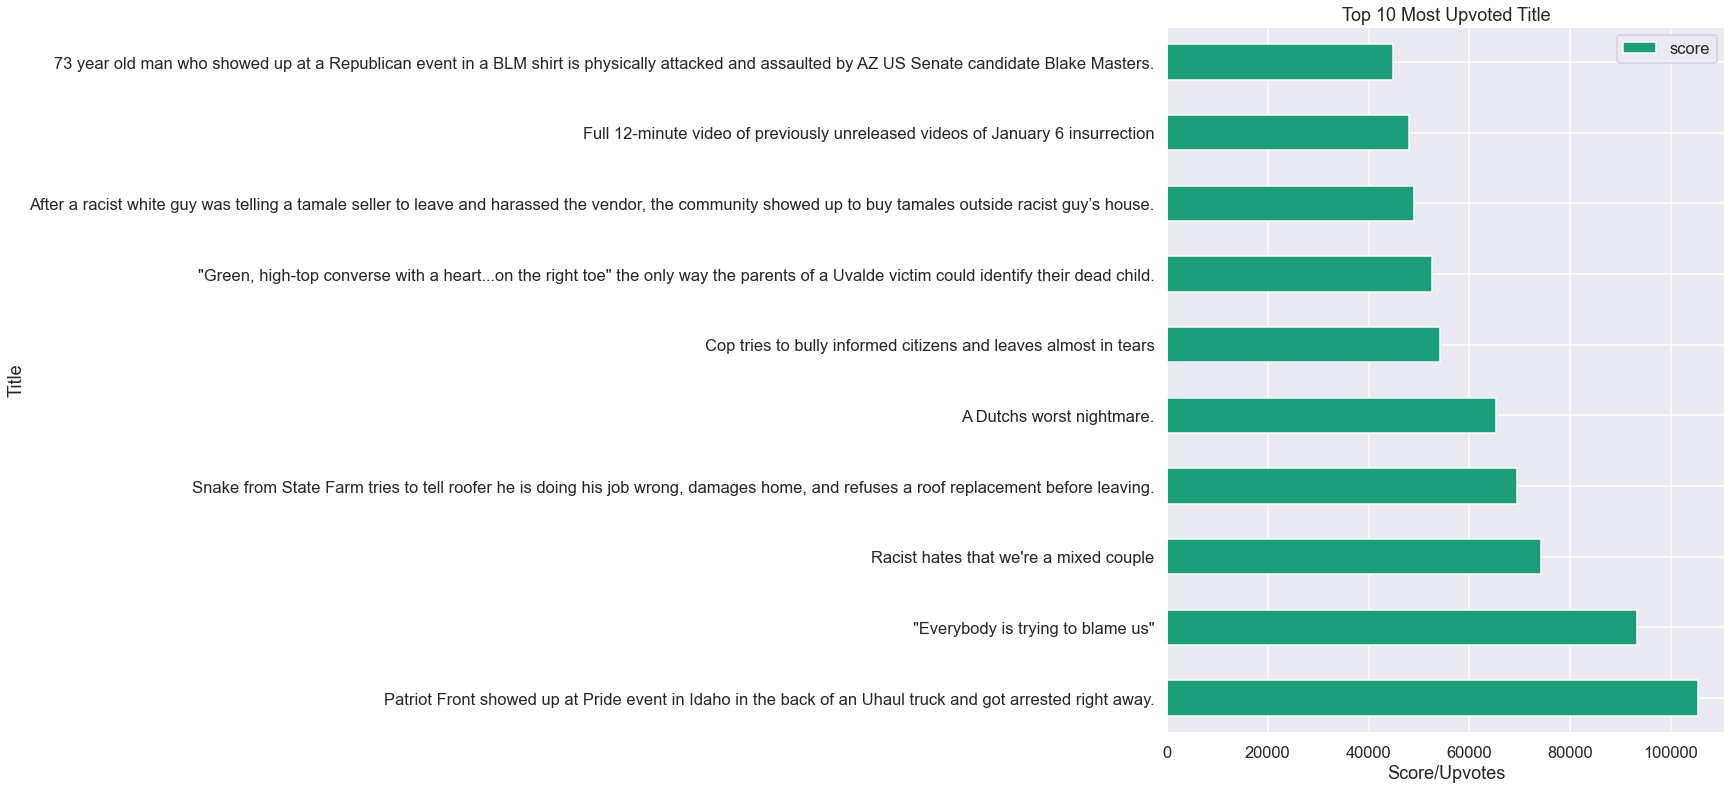

In [17]:
#Top 10 Upvoted Title
top10 = df3.groupby('title')['score'].sum()
top10s = pd.DataFrame(top10.sort_values(ascending=False).head(10))
top10s.plot(kind='barh',figsize=(10, 13))
plt.title('Top 10 Most Upvoted Title')
plt.ylabel('Title')
plt.xlabel('Score/Upvotes')

Text(0.5, 0, 'Number of Comments')

C:\Users\teeja\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8294 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\teeja\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8297 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\teeja\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8294 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\teeja\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8297 missing from current font.
  font.set_text(s, 0, flags=flags)


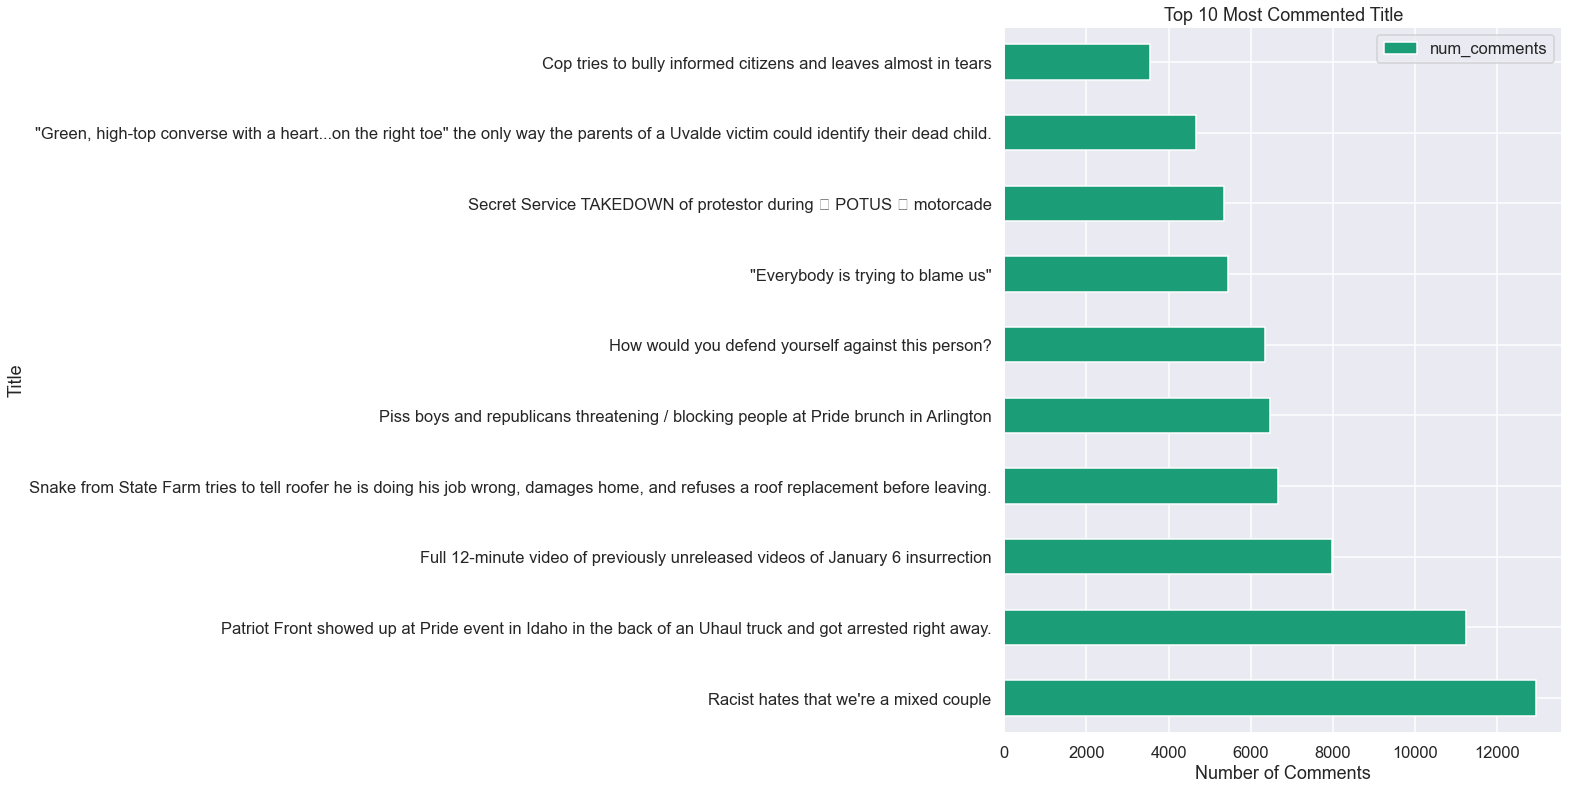

In [18]:
#Top 10 Most Commented Title
top10cmnt = df3.groupby('title')['num_comments'].sum()
top10scmnt = pd.DataFrame(top10cmnt.sort_values(ascending=False).head(10))
top10scmnt.plot(kind='barh',figsize=(10, 13))
plt.title('Top 10 Most Commented Title')
plt.ylabel('Title')
plt.xlabel('Number of Comments')

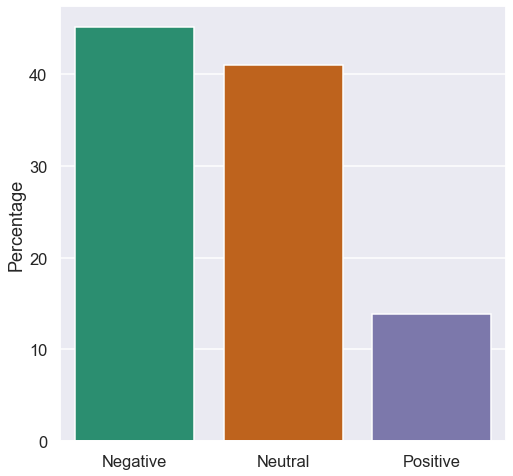

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [20]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [21]:
tokenizer = RegexpTokenizer(r'\w+')

## Word Distributions


In [22]:
def process_text(titles):
    tokens = []
    for line in titles:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [23]:
pos_lines = list(df[df.label == 1].title)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('guy', 9),
 ('like', 9),
 ('man', 7),
 ('security', 6),
 ('world', 6),
 ('local', 5),
 ('woman', 5),
 ('well', 5),
 ('friend', 4),
 ('karen', 4),
 ('pride', 4),
 ('save', 4),
 ('god', 4),
 ('good', 4),
 ('fun', 3),
 ('guard', 3),
 ('happened', 3),
 ('still', 3),
 ('maga', 3),
 ('says', 3)]

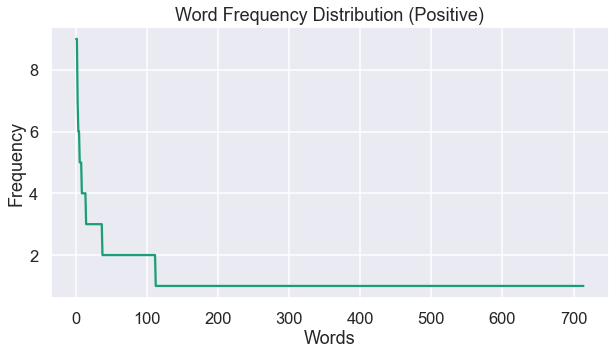

In [24]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)



plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

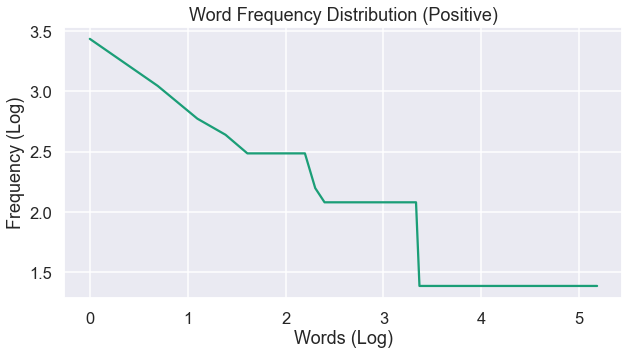

In [25]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [26]:
neg_lines = list(df2[df2.label == -1].title)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('man', 48),
 ('police', 31),
 ('guy', 30),
 ('woman', 28),
 ('people', 21),
 ('gets', 20),
 ('fight', 19),
 ('racist', 16),
 ('arrested', 15),
 ('india', 13),
 ('car', 13),
 ('gun', 12),
 ('attack', 12),
 ('public', 12),
 ('cop', 12),
 ('video', 11),
 ('front', 11),
 ('arrest', 11),
 ('driver', 11),
 ('stop', 10)]

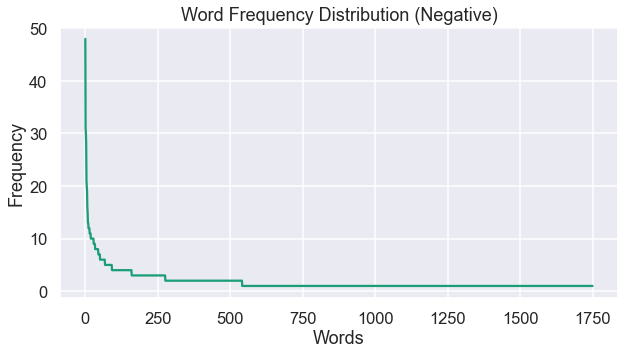

In [27]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

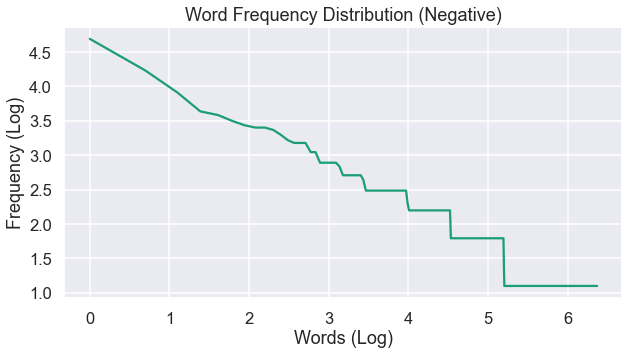

In [28]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

<h1 style="font-size: 30px; color:#ec4e20; align: center; text-shadow: 2px 2px  #777777;">Insights, Conclusion, and Recommendations</h1>   
    


As seen from the study, the researchers have grabbed all positive and negative posts as segregated using Sentiment Analysis. It can be observed that with the use of Reddit API, the researchers can observe the behavior of subreddit's and how they function. There is a correlation in engagement between the number of comments and upvotes a post receives, with titles commonly seen in both graphs. The word frequency distribution shows how much words that have been used in the titles of all posts collected weigh as positive or negative. In conclusion, The Reddit API is simple to use and compiles big volumes of data quickly. It is also simple to gather a big number of titles or headlines for analysis. You may use the Reddit API's Sentiment Analysis to assess whether a subreddit has a positive or negative connotation.

The researchers recommend to use Machine Learning Models to predict and use other text classifiers. You could do reddit api with vader sentiment analysis too.

<h1 style="font-size: 30px; color:#ec4e20; align: center; text-shadow: 2px 2px  #777777;">References</h1>   
    


1. Quick Start &mdash; PRAW 7.6.1.dev0 documentation. (n.d.). Quick Start &mdash; PRAW 7.6.1.Dev0 Documentation; praw.readthedocs.io. Retrieved June 16, 2022, from https://praw.readthedocs.io/en/latest/getting_started/quick_start.html


2. Boe, B. (2016, December 12). Python reddit API wrapper documentation - buildmedia.readthedocs.org. Retrieved June 16, 2022, from https://buildmedia.readthedocs.org/media/pdf/praw/v2.1.21/praw.pdf 


3. Tanner, G. (2019, February 12). Scraping reddit data. Medium. Retrieved June 16, 2022, from https://towardsdatascience.com/scraping-reddit-data-1c0af3040768 


4. Yalçın, O. G. (2021, February 2). Sentiment analysis in 10 minutes with rule-based Vader and NLTK. Medium. Retrieved June 16, 2022, from https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-rule-based-vader-and-nltk-72067970fb71 